# Heart Disease Prediction

In this project, I am looking at **the heart disease dataset from kaggle**. This dataset has information on a person age, sex, cholestrol and other heart health metrics from EKG etc. The dataset also has a target variable which which tells if the person has heart issues (1) or if they have a healthy heart (0). **The aim of this project is to build a classification model that tells whether a person has healthy heart or not**.

I will first load the dataset, get some statistical info on it and clean it. I will then split it into a training and a test set. Then I will train a **Logistic Regression model on the test set and use it to make prediction about the test set**. I have also trained a bunch of other model, but there was no noticeable improvement in accuracy. The model works with an **accuracy of 80% on the test set**. Finally, I have made a **predictive system** where you can input the metrics for your heart and the model will predict if you have a good heart.

I have then saved this model and deployed it to webapp using **streamlit**.

In [145]:
# importing the dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Data Collection and Processing

In [146]:
# loading the data file.
heart = pd.read_csv("heart_disease_data.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [147]:
# getting the shape of data.
heart.shape

(303, 14)

In [148]:
# getting info of the data.
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [149]:
# checking for null values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [150]:
# getting statistical measures of the data.
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [151]:
# how many have heart disease vs not.
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Feature Extraction

In [152]:
X  = heart.drop(columns='target', axis = 1)
y = heart['target']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)

In [154]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### Model training and prediction

### Logistic Regression model

Accuracy of Logistic Regression: 83.60655737704919 

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

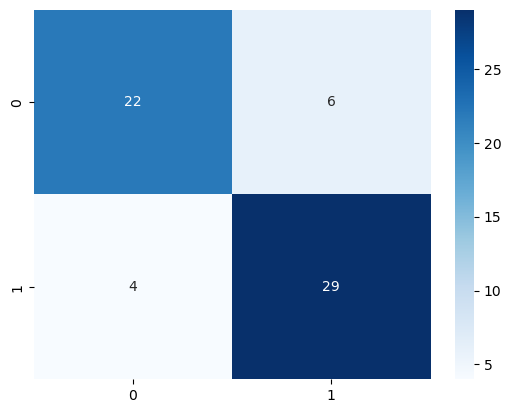

In [155]:
from sklearn.linear_model import LogisticRegression

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_acc_score = accuracy_score(y_test, lr_predict)
print("Accuracy of Logistic Regression:", lr_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, lr_predict))

# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, lr_predict)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

### Gaussian NB model

Accuracy of Naive Bayes model: 80.32786885245902 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



<Axes: >

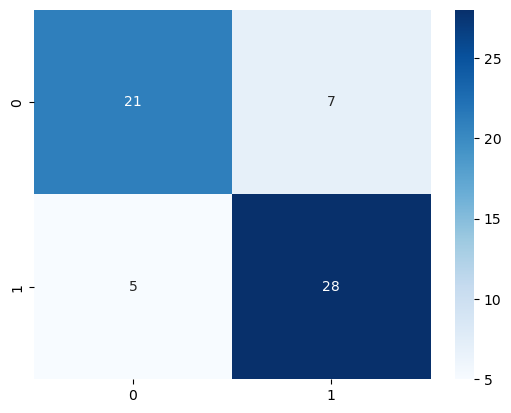

In [156]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)

nb_acc_score = accuracy_score(y_test, nbpred)
print("Accuracy of Naive Bayes model:", nb_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, nbpred))

# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, nbpred)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

### Random Forest Classifier.

Accuracy of Random Forest: 80.32786885245902 

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



<Axes: >

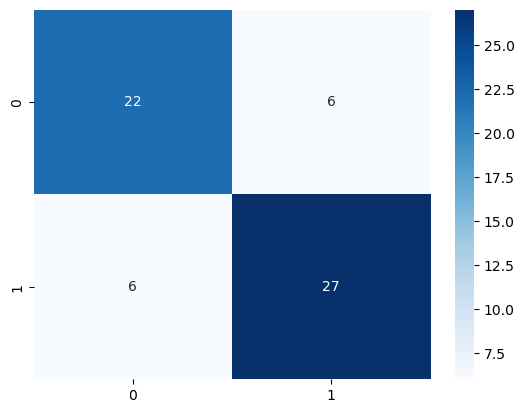

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

m3 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Accuracy of Random Forest:", rf_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, rf_predicted))
# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, rf_predicted)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

### XG Boost Classifier

Accuracy of Extreme Gradient Boost: 81.9672131147541 

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



<Axes: >

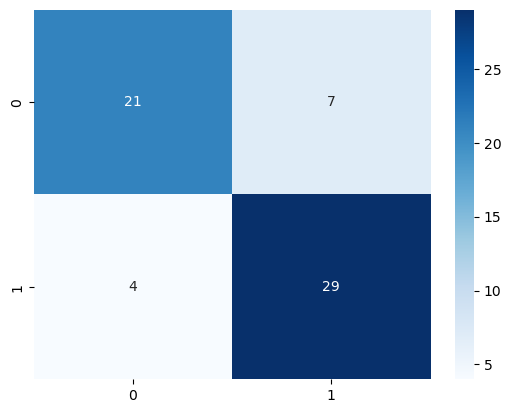

In [158]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52,
                    colsample_bytree=0.6, seed=27, reg_lambda=2, booster='dart',
                    colsample_bylevel=0.6, colsample_bynode=0.5)

xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("Accuracy of Extreme Gradient Boost:", xgb_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, xgb_predicted))
# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, xgb_predicted)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

### KNN Classifier.

Accuracy of K-Neighbors Classifier: 67.21311475409836 

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        28
           1       0.72      0.64      0.68        33

    accuracy                           0.67        61
   macro avg       0.67      0.68      0.67        61
weighted avg       0.68      0.67      0.67        61



<Axes: >

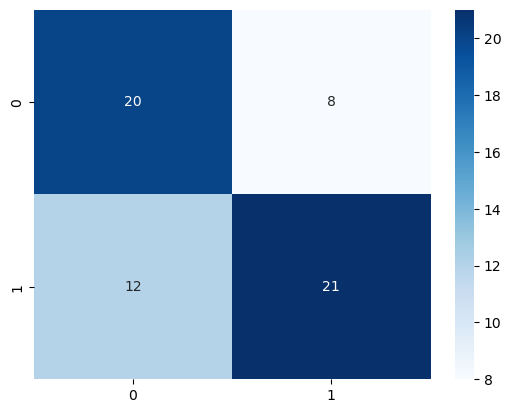

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

m5 = 'K-Neighbors Classifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("Accuracy of K-Neighbors Classifier:", knn_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, knn_predicted))
# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, knn_predicted)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")


### Decision Tree Classifier

Accuracy of DecisionTreeClassifier: 75.40983606557377 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.80      0.73      0.76        33

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



<Axes: >

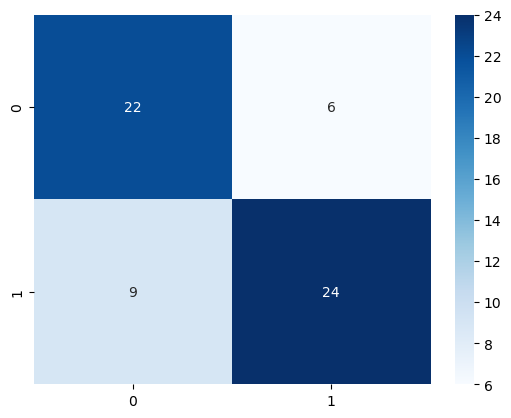

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)

dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, dt_predicted)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

### SVC Classifier

Accuracy of Support Vector Classifier: 72.1311475409836 

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        28
           1       0.71      0.82      0.76        33

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



<Axes: >

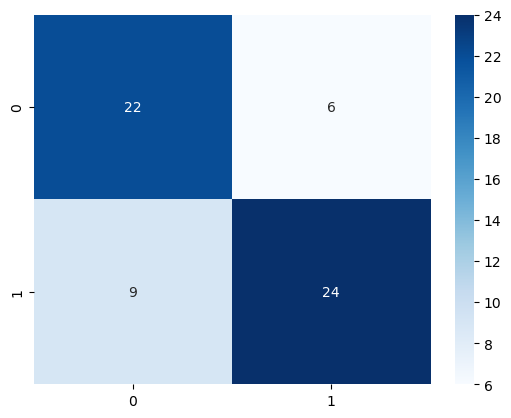

In [161]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)

svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, dt_predicted)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

### Most important features learned by xgb

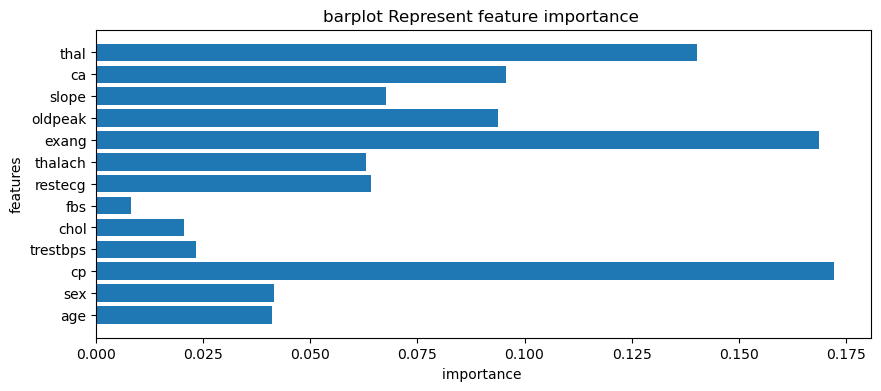

In [162]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

### Evaluating model performace

In [163]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.606557
1,Naive Bayes,80.327869
2,Random Forest,80.327869
3,Extreme Gradient Boost,81.967213
4,K-Nearest Neighbour,67.213115
5,Decision Tree,75.409836
6,Support Vector Machine,72.131148


### Building a predictive system

In [164]:
input_data = (60,1,0,117,230,1,1,160,1,1.4,2,2,3,) #(56,0,1,140,294,0,0,153,0,1.3,1,0,2)

# change the input data to numpy array.
input_data = np.asarray(input_data)

# making prediction for this particular input.
input_data_reshaped = input_data.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print("You dont have a Heart Disease.")
else:
    print("You have a Heart Disease.")

[0]
You dont have a Heart Disease.


/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Saving the trained model

In [165]:
import pickle

In [166]:
filename = 'trained_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [167]:
# loading the saved model.
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [168]:
input_data = (60,1,0,117,230,1,1,160,1,1.4,2,2,3,) #(56,0,1,140,294,0,0,153,0,1.3,1,0,2)

# change the input data to numpy array.
input_data = np.asarray(input_data)

# making prediction for this particular input.
input_data_reshaped = input_data.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print("You dont have a Heart Disease.")
else:
    print("You have a Heart Disease.")

[0]
You dont have a Heart Disease.


/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
